In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
import re 
def cleanup(text):

    import string
    punctuation = '[!\-.:?;]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, ' ', text)
    return text_subbed

In [3]:
treinamento1 = pd.read_excel("FelipeNeto_1.xlsx",sheet_name = 'Treinamento', index = False)
treinamento2 = pd.read_excel("FelipeNeto_2.xlsx",sheet_name = 'Treinamento', index = False)
treinamento3 = pd.read_excel("FelipeNeto_3.xlsx",sheet_name = 'Treinamento', index = False)
treinamento4 = pd.read_excel("FelipeNeto_4.xlsx",sheet_name = 'Treinamento', index = False)

lista_treinamentos=[treinamento1,treinamento2,treinamento3,treinamento4]

treinamento=pd.concat(lista_treinamentos,sort=False) #Juntando todas as planilhas

probabilidades=treinamento["Valor"].value_counts(True)#Calculando as frequências relativas de cada categoria

In [4]:
prob_ama = probabilidades[0]
prob_concorda = probabilidades[1]
prob_discorda = probabilidades[2]
prob_odeia = probabilidades[3]
prob_desrel = probabilidades[4]

In [5]:
ama = treinamento[treinamento["Valor"]==0]
ama = ama["Treinamento"].str.cat()

ama = cleanup(ama).split()
set(ama);
serie_ama=pd.Series(ama)

In [6]:
tabela_ama = serie_ama.value_counts(True)
tabela_ama;

In [7]:
concorda = treinamento[treinamento["Valor"]==1]
concorda = concorda["Treinamento"].str.cat()

concorda = cleanup(concorda).split()
set(concorda);
serie_concorda=pd.Series(concorda)

In [8]:
tabela_concorda = serie_concorda.value_counts(True)
tabela_concorda;

In [9]:
discorda = treinamento[treinamento["Valor"]==2]
discorda = discorda["Treinamento"].str.cat()

discorda = cleanup(discorda).split()
set(discorda);
serie_discorda=pd.Series(discorda)

In [10]:
tabela_discorda = serie_discorda.value_counts(True)
tabela_discorda;

In [11]:
odeia = treinamento[treinamento["Valor"]==3]
odeia = odeia["Treinamento"].str.cat()

odeia = cleanup(odeia).split()
set(odeia);

serie_odeia=pd.Series(odeia)

In [12]:
tabela_odeia = serie_odeia.value_counts(True)
tabela_odeia;

In [13]:
desrelacionado = treinamento[treinamento["Valor"]==4]
desrelacionado = desrelacionado["Treinamento"].str.cat()

desrelacionado = cleanup(desrelacionado).split()
set(desrelacionado);

serie_desrelacionado=pd.Series(desrelacionado)

In [14]:
tabela_desrel = serie_desrelacionado.value_counts(True)
tabela_desrel;

In [15]:
def classifica_palavra(frase):
    lista_palavras = frase.split()
    p0 = 1
    p1 = 1
    p2 = 1
    p3 = 1
    p4 = 1
    for word in lista_palavras:
        if word in tabela_ama.index:
            pword0 = tabela_ama[word]
        else:
            pword0 = 1
        if word in tabela_concorda.index:
            pword1 = tabela_concorda[word]
        else:
            pword1 = 1
        if word in tabela_discorda.index:
            pword2 = tabela_discorda[word]
        else:
            pword2 = 1
        if word in tabela_odeia.index:
            pword3 = tabela_odeia[word]
        else:
            pword3 = 1
        if word in tabela_desrel.index:
            pword4 = tabela_desrel[word]
        else:
            pword4 = 1
        p0 *= pword0
        p1 *= pword1
        p2 *= pword2
        p3 *= pword3
        p4 *= pword4
    if p0 == 1:
        p0 -= 1
    if p1 == 1:
        p1 -= 1
    if p2 == 1:
        p2 -= 1
    if p3 == 1:
        p3 -= 1
    if p4 == 1:
        p4 -= 1
    p0 *= prob_ama
    p1 *= prob_concorda
    p2 *= prob_discorda
    p3 *= prob_odeia
    p4 *= prob_desrel
    if (p0 > p1) and (p0 > p2) and (p0 > p3) and (p0 > p4):
        return "Ama"
    elif (p1 > p0) and (p1 > p2) and (p1 > p3) and (p1 > p4):
        return "Concorda"
    elif (p2 > p0) and (p2 > p1) and (p2 > p3) and (p2 > p4):
        return "Discorda"
    elif (p3 > p0) and (p3 > p1) and (p3 > p2) and (p3 > p4):
        return "Odeia"
    elif (p4 > p0) and (p4 > p1) and (p4 > p2) and (p4 > p3):
        return "Desrelacionado"
    
    return "p0: {0} - p1: {1} - p2: {2} - p3: {3} - p4: {4}".format(p0,p1,p2,p3,p4)

In [29]:
experimento = "herói"
print(classifica_palavra(experimento))

Concorda


In [17]:
teste1 = pd.read_excel("FelipeNeto_1.xlsx",sheet_name = 'Teste', index = False)
teste2 = pd.read_excel("FelipeNeto_2.xlsx",sheet_name = 'Teste', index = False)
teste3 = pd.read_excel("FelipeNeto_3.xlsx",sheet_name = 'Teste', index = False)
teste4 = pd.read_excel("FelipeNeto_4.xlsx",sheet_name = 'Teste', index = False)

lista_teste =[teste1,teste2,teste3,teste4]
teste = pd.concat(lista_teste,sort=False) #Juntando todas as planilhas

In [39]:
teste_idx = teste.set_index("Teste")
lista_tweets = list(teste_idx.index)

In [42]:
for tweet in lista_tweets:
    teste_idx.loc[tweet,"Classificação"] = classifica_palavra(tweet)

In [46]:
teste_idx

,Classificação
Teste,
"mano??? nmrl, pq toda essa coisa contra o felipe neto? tá tá mentira, tanta coisa que ficam inventando pra tentar ferrar com ele pra quê? o cara só quer ajudar os outros, tentar alegrar o dia deles pra, no fim, tentarem acabar com ele.",Ama
@igoraraujojj quem diria que felipe neto franzino teria capacidade de esmurrar igor desse jeito ne? 😂😂😂😂,Ama
felipe neto é o câncer dessa nova geração. essa amoeba que muda mais de cabelo do que de roupa é um covarde nojento.,Concorda
#paiscontrafelipeneto \n\nfelipe neto é uma péssima influência. e é tão covarde que seu público alvo são crianças que não podem se defender.\n\nmas não tem problema não. pais servem pra isso.\n\ngraças a deus meu filho acha ele um babaca.,Ama
a que pontos chegamos heim meu brasil? a semana já começa com felipe neto e carlos bolsonaro nos trending topics sobre politica. a prova clara que somos o chorume do mundo. ngm faz nada sério por aqui,Ama
@marcelofreixo @felipeneto felipe neto tem o meu respeito!!,Desrelacionado
escola pede aos pais que não deixem seus filhos assistirem vídeos de felipe neto e causa polêmica https://t.co/svsshhpg9m,Ama
"@monaiisacortz os intelectuais de esquerda são rafinha bastos, marcelo d2 e felipe neto?? vcs estão bem representados, kkkkkkk,",Ama
"@felipecoazz não, amigo. vamos eleger felipe neto e tábata amaral",Odeia


In [48]:
writer = pd.ExcelWriter('FelipeNetoNaiveBayes.xlsx', engine='xlsxwriter')
teste_idx.to_excel(writer, sheet_name='Teste')

In [49]:
writer.save()

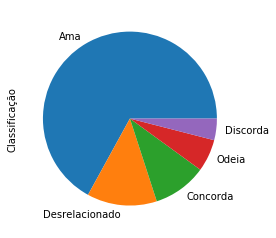

In [60]:
teste.Classificação.value_counts().plot.pie()